In [4]:
import sys
from os.path import expanduser, join
home = expanduser("~")
sys.path.append(join(home, 'Repositories/QuREBB'))

import numpy as np

import lib.protocol as protocol
from protocols.tutorial_protocols import ProtocolA, ProtocolB, ProtocolC

In [5]:
common_params = {
    'gamma_dephasing': 30.5e6,
    'splitting': 1e9,
    'DW': 0.7,
    'QE': 0.2,
    'link_loss': 0.99,
    'insertion_loss': 0.5,
    'dim': 3,
    'dc_rate': 0,
    'ideal': False
}

projector_params = {
    'f_operation': 0e9,
    'delta': 0e9,
    'kappa_r': 21.8e9/2,
    'kappa_t': 21.8e9/2, 
    'gamma': 92.5e6,
    'g': 8.38e9,
    'dc_rate': 0.000,
}

emission_params = {
    'f_operation': 0e9,
    'delta': 0e9,
    'kappa_in': 240e9,
    'kappa_loss': 89e9, 
    'gamma': 100e6,
    'g': 6.81e9,
    'alpha': 0.1
}
projector_params.update(common_params)
emission_params.update(common_params)

In [6]:
sweep_params={'f_operation': np.linspace(-10e9, 10e9, 5), "delta": np.linspace(-10e11, 10e11, 5)}

In [7]:
ps = protocol.ProtocolSweep(ProtocolC, projector_params, sweep_params)

In [8]:
ps.run()

Sweep time with multi was 4.479 s


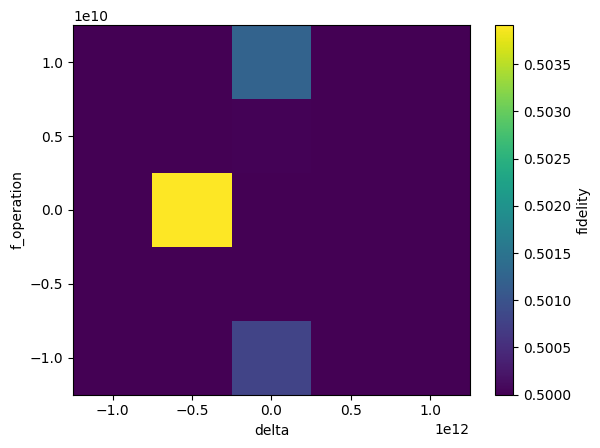

In [9]:
ps.dataset.fidelity.plot()

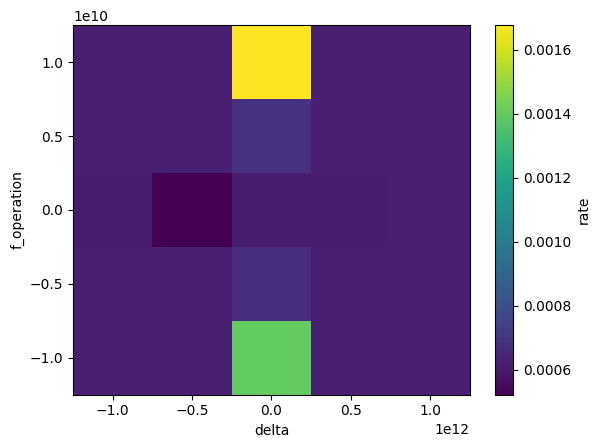

In [10]:
ps.dataset.rate.plot()

In [11]:
ps.generate_fidelity_rate_curve()

In [12]:
ps.dataset_fidelity_rate

<xarray.Dataset>
Dimensions:      (rate: 100)
Coordinates:
    f_operation  (rate) float64 0.0 1e+10 1e+10 1e+10 ... 1e+10 1e+10 1e+10
    delta        (rate) float64 -5e+11 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
  * rate         (rate) float64 0.0005226 0.0005342 ... 0.001665 0.001677
Data variables:
    fidelity     (rate) float64 0.5039 0.5012 0.5012 ... 0.5012 0.5012 0.5012
Attributes: (12/13)
    kappa_r:          10900000000.0
    kappa_t:          10900000000.0
    gamma:            92500000.0
    g:                8380000000.0
    dc_rate:          0
    gamma_dephasing:  30500000.0
    ...               ...
    DW:               0.7
    QE:               0.2
    link_loss:        0.99
    insertion_loss:   0.5
    dim:              3
    ideal:            False

In [13]:
ps.save_folder = "~/Desktop/simulation_datasets"

In [14]:
ps.save_dataset()

In [15]:
protocol.load_dataset("~/Desktop/simulation_datasets/20231006-153749-225-dataset.hdf5").attrs

{'kappa_r': 10900000000.0,
 'kappa_t': 10900000000.0,
 'gamma': 92500000.0,
 'g': 8380000000.0,
 'dc_rate': 0,
 'gamma_dephasing': 30500000.0,
 'splitting': 1000000000.0,
 'DW': 0.7,
 'QE': 0.2,
 'link_loss': 0.99,
 'insertion_loss': 0.5,
 'dim': 3,
 'ideal': False}